<a href="https://colab.research.google.com/github/fsajad9/SGD_monotone/blob/main/Mon_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(42)

In [70]:
n=1000
d=2000
xx=np.random.rand(d,n)
x11=np.ones((1,n),dtype=float)
x=np.concatenate((x11,xx))
w_0=2*np.ones((1,d+1))
eps=np.random.randn(1,n)
y=np.dot(w_0,x)+.1*eps

In [71]:
class Mon:
  def __init__(self,x,y,w):
    self.x=x
    self.y=y
    self.w=w
  def error(self):
    return np.dot(self.w,self.x)-self.y  

  def loss(self):
    return (self.error()**2).mean()
  def grad_w(self):
    return (2*self.x*self.error()).mean(1)

  def new_point(self,alp):
    return self.w-alp*self.grad_w()



In [72]:

def ste_siz(x,y,w,beta,c,loss,grad_w,alpha):

  w1=w-alpha*grad_w
  yhat=np.dot(w1,x)
  error=yhat-y
  loss_new=(error**2).mean()
  no=np.linalg.norm(grad_w)
  for i in range(10):
    if loss_new<=loss-alpha*c*no**2:
      break
    alpha=alpha*beta
    w1=w-alpha*grad_w
    error=np.dot(w1,x)-y
    loss_new=(error**2).mean()
  alpha=min(1,alpha)  
  return alpha    

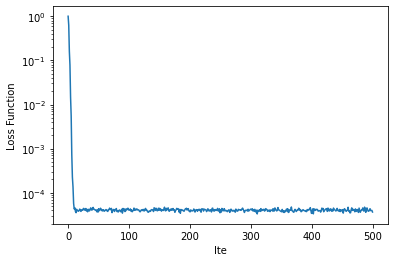

In [78]:
w=np.random.randn(1,d+1)
n_epoch=500
losses=[]
c=.1
beta=.75
alpha=.01
for i in range(n_epoch):
  m1=np.random.randint(0,n,int(n/2))
  x1=x[:,m1]
  y1=y[:,m1]
  mm=Mon(x1,y1,w)
  los=mm.loss()
  losses.append(los)
  grad=mm.grad_w()
  alp=ste_siz(x,y,w,beta,c,los,grad,alpha)
  w=mm.new_point(alp)

  alpha=2*alp
losses=losses/((losses[0]))  
plt.plot(losses)
plt.yscale('log')
plt.ylabel('Loss Function')
plt.xlabel('Ite')
plt.show()


In [79]:
min(losses)

3.320488179879859e-05